In [1]:
!pip install opencv-python

In [2]:
pip install face-recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Running setup.py clean for dlib
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [47 lines of output]
  C:\Users\DELL\AppData\Local\Temp\pip-install-96cs3ate\dlib_f44c9e50d3c849b8b6d2b41a431faf7f\setup.py:234: SyntaxWarning: invalid escape sequence '\('
    major = re.findall("set\(CPACK_PACKAGE_VERSION_MAJOR.*\"(.*)\"", open(cmake_file).read())[0]
  C:\Users\DELL\AppData\Local\Temp\pip-install-96cs3ate\dlib_f44c9e50d3c849b8b6d2b41a431faf7f\setup.py:235: SyntaxWarning: invalid escape sequence '\('
    minor = re.findall("set\(CPACK_PACKAGE_VERSION_MINOR.*\"(.*)\"", open(cmake_file).read())[0]
  C:\Users\DELL\AppData\Local\Temp\pip-install-96cs3ate\dlib_f44c9e50d3c849b8b6d2b41a431faf7f\setup.py:236: SyntaxWarning: invalid escape sequence '\('
    patch = re.findall("set\(CPACK_PACKAGE_VERSION_PATCH.*\"(.*)\"", open(cmake_file).read())[0]
  running bdist_wheel
  running build
  running build_ext
  
  
                     CMake is not installed on your

In [3]:
pip install dlib-19.22.99-cp39-cp39-win_amd64.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: dlib-19.22.99-cp39-cp39-win_amd64.whl is not a supported wheel on this platform.


In [4]:
import cv2
import matplotlib.pyplot as plt

Face recognition process completed.


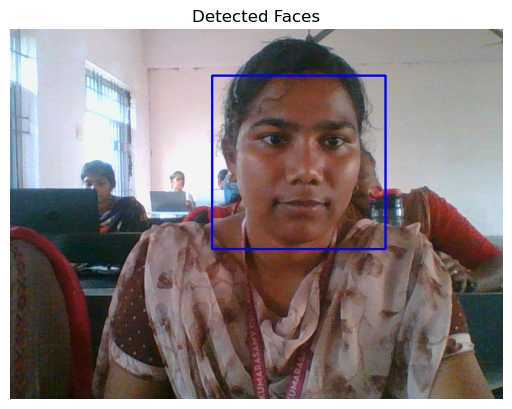

In [7]:
# Initialize the face classifier
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start video capture
cap = cv2.VideoCapture(0)
last_frame = None  # Variable to store the last frame

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Store the frame to display it later
    last_frame = frame

    # Display the resulting frame
    cv2.imshow('Face Recognition', frame)

    # Exit on pressing 'q' or if the window is closed
    if cv2.waitKey(1) & 0xFF == ord('q') or cv2.getWindowProperty('Face Recognition', cv2.WND_PROP_VISIBLE) < 1:
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# Print message after recognition window is closed
print("Face recognition process completed.")

# Display the last frame with detected faces using matplotlib
if last_frame is not None:
    # Convert from BGR to RGB for matplotlib display
    last_frame_rgb = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
    plt.imshow(last_frame_rgb)
    plt.title("Detected Faces")
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("No frame was captured.")